In [4]:
#From SAV to LOVE

# HW №7

In [5]:
from sklearn.datasets import make_blobs
import random
from matplotlib import pyplot as plt
import numpy as np

## Задача №1

К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов.


### Ответ

In [6]:
def knn(x_train, y_train, x_test, k):
    answers = []
    for x in x_test:
        test_distances = [(e_metrics(x, x_train[i]), y_train[i]) for i in range(len(x_train))]
        classes = {class_item: 0 for class_item in set(y_train)}
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1/(d[0]+0.01)**2 
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

## Задача №2

Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

In [7]:
X, y = make_blobs(n_samples=1000, random_state=1)

### Ответ

In [8]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [9]:
def kmeans(data, k, max_iterations, min_distance):    
    centroids = [data[i] for i in range(k)]
    for _ in range(max_iterations):
        classes = {i: [] for i in range(k)}
        for x in data:
            distances = [e_metrics(x, centroid) for centroid in centroids]
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        old_centroids = centroids.copy()
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                break

        if optimal:
            break
    
    return old_centroids, classes

In [10]:
k=5
max_iterations = 100
min_distance = 1e-4

In [11]:
centroids, clusters = kmeans(X, k, max_iterations, min_distance)

In [12]:
def acc_mse(centroids, classes):
    res = 0
    for i in range(len(centroids)):
        res += sum([e_metrics(x, centroids[i]) for x in classes[i]])/len(classes[i])
    return res

In [13]:
k_count = [i for i in range(1,11)]
acc = []
for k in k_count:
    centroids, clusters = kmeans(X, k, max_iterations, min_distance)
    acc.append(acc_mse(centroids, clusters))

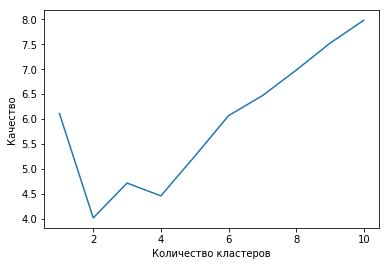

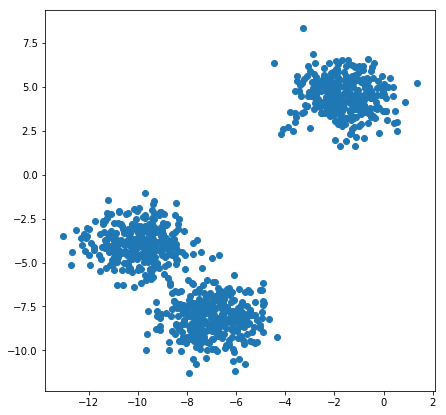

In [14]:
%matplotlib inline

plt.plot(k_count, acc)
plt.xlabel('Количество кластеров')
plt.ylabel('Качество')


plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1])
plt.show()


### При трех четко выраженных кластеров, наименьшая ошибка при двух. 

## Сгенерируем новый дата сет для чистоты эксперимента

In [15]:
X, y = make_blobs(n_samples=1000, random_state=7)

In [16]:
centroids, clusters = kmeans(X, k, max_iterations, min_distance)

In [17]:
max_iterations = 100
min_distance = 1e-4
k_count = [i for i in range(1,11)]
acc = []
for k in k_count:
    centroids, clusters = kmeans(X, k, max_iterations, min_distance)
    acc.append(acc_mse(centroids, clusters))

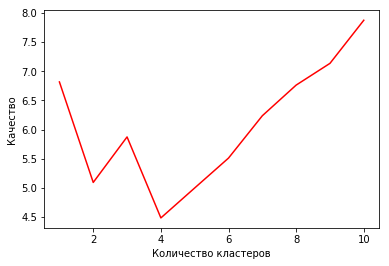

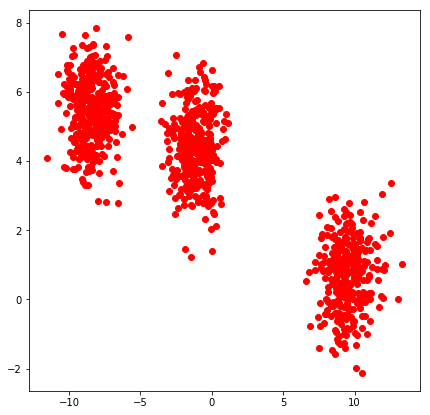

In [18]:
%matplotlib inline

plt.plot(k_count, acc,color='red')
plt.xlabel('Количество кластеров')
plt.ylabel('Качество')


plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1], color='red')
plt.show()


### При трех четко выраженных кластеров, наименьшая ошибка при четырех. 

## Сгенерируем новый дата сет для чистоты эксперимента

In [19]:
X, y = make_blobs(n_samples=1000, random_state=8)

In [20]:
centroids, clusters = kmeans(X, k, max_iterations, min_distance)

In [21]:
max_iterations = 100
min_distance = 1e-4
k_count = [i for i in range(1,11)]
acc = []
for k in k_count:
    centroids, clusters = kmeans(X, k, max_iterations, min_distance)
    acc.append(acc_mse(centroids, clusters))

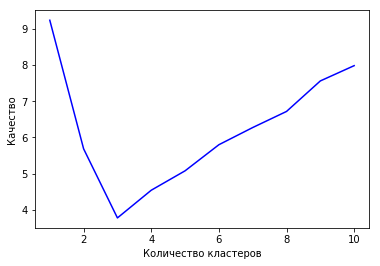

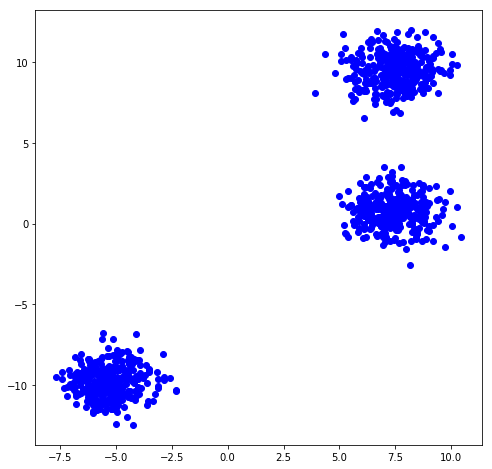

In [22]:
%matplotlib inline

plt.plot(k_count, acc,color='b')
plt.xlabel('Количество кластеров')
plt.ylabel('Качество')


plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], color='b')
plt.show()


# Здесь идеально При трех четко выраженных кластеров, наименьшая ошибка также при трех. 